<a href="https://colab.research.google.com/github/VaibhavdLights/LLM-Practice-Codes/blob/main/NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install datasets evaluate transformers==4.44.2 seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.8 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=2a51504e2167d7f341eca0c3e46ece94cf8beb2f04439187fd476cb5759c2403
  Stored in 

In [2]:
from datasets import get_dataset_config_names

In [3]:
xtreme_subsets = get_dataset_config_names('xtreme')
print(f'XTREME has {len(xtreme_subsets)} configurations')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/131k [00:00<?, ?B/s]

XTREME has 183 configurations


In [4]:
panx_subsets = [s for s in xtreme_subsets if s.startswith('PAN')]
panx_subsets[:3]

['PAN-X.af', 'PAN-X.ar', 'PAN-X.bg']

In [5]:
from datasets import load_dataset

load_dataset('xtreme', name='PAN-X.de')

train-00000-of-00001.parquet:   0%|          | 0.00/1.18M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/590k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/588k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 20000
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'langs'],
        num_rows: 10000
    })
})

In [6]:
from collections import defaultdict
from datasets import DatasetDict

In [7]:
langs = ['de', 'fr', 'it', 'en']
fracs =[0.629, 0.229, 0.084, 0.059]

panx_ch = defaultdict(DatasetDict)

In [8]:
for lang, frac in zip(langs, fracs):
    ds = load_dataset('xtreme', name=f'PAN-X.{lang}')
    #shuffle and downsample
    for split in ds:
        panx_ch[lang][split] = (
            ds[split]
            .shuffle(seed=0)
            .select(range(int(frac * ds[split].num_rows)))
        )

train-00000-of-00001.parquet:   0%|          | 0.00/837k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/419k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/423k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/932k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/459k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/464k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

train-00000-of-00001.parquet:   0%|          | 0.00/942k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/472k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/472k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [9]:
import pandas as pd

In [10]:
pd.DataFrame({lang: [panx_ch[lang]['train'].num_rows] for lang in langs}, index=['Number of training examples'])

,de,fr,it,en
Number of training examples,12580,4580,1680,1180


In [11]:
element = panx_ch['de']['train'][0]
for key, value in element.items():
    print(f'{key} : {value}')

tokens : ['2.000', 'Einwohnern', 'an', 'der', 'Danziger', 'Bucht', 'in', 'der', 'polnischen', 'Woiwodschaft', 'Pommern', '.']
ner_tags : [0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0]
langs : ['de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de']


In [12]:
for key, value in panx_ch['de']['train'].features.items():
    print(f'{key} : {value}')

tokens : Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)
ner_tags : Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None), length=-1, id=None)
langs : Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)


In [13]:
tags = panx_ch['de']['train'].features['ner_tags'].feature

In [14]:
tags

ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None)

In [15]:
def create_tag_names(batch):
    return {'ner_tags_str': [tags.int2str(idx) for idx in batch['ner_tags']]}

In [16]:
panx_de = panx_ch['de'].map(create_tag_names)

Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

In [17]:
de_example = panx_de['train'][0]
pd.DataFrame([de_example['tokens'], de_example['ner_tags_str']], ['Tokens', 'Tags'])

,0,1,2,3,4,5,6,7,8,9,10,11
Tokens,2.000,Einwohnern,an,der,Danziger,Bucht,in,der,polnischen,Woiwodschaft,Pommern,.
Tags,O,O,O,O,B-LOC,I-LOC,O,O,B-LOC,B-LOC,I-LOC,O


In [18]:
from collections import Counter

In [19]:
split2freqs = defaultdict(Counter)
for split, dataset in panx_de.items():
    for row in dataset['ner_tags_str']:
        for tag in row:
            if tag.startswith('B'):
                tag_type = tag.split('-')[1]
                split2freqs[split][tag_type] += 1

pd.DataFrame.from_dict(split2freqs, orient='index')

,LOC,ORG,PER
train,6186,5366,5810
validation,3172,2683,2893
test,3180,2573,3071


In [20]:
from transformers import AutoTokenizer

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [21]:
bert_model_name = 'bert-base-cased'
xlmr_model_name = 'xlm-roberta-base'

bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
xlmr_tokenizer = AutoTokenizer.from_pretrained(xlmr_model_name)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [22]:
text = 'Bali is a beautiful place. Jack Sparrow'
bert_tokens = bert_tokenizer(text).tokens()
xlmr_tokens = xlmr_tokenizer(text).tokens()

In [23]:
bert_tokens

['[CLS]',
 'Bali',
 'is',
 'a',
 'beautiful',
 'place',
 '.',
 'Jack',
 'Spa',
 '##rrow',
 '[SEP]']

In [24]:
xlmr_tokens

['<s>',
 '▁Bali',
 '▁is',
 '▁a',
 '▁beautiful',
 '▁place',
 '.',
 '▁Jack',
 '▁Spar',
 'row',
 '</s>']

In [25]:
import torch.nn as nn
from transformers import XLMRobertaConfig
from transformers.modeling_outputs import TokenClassifierOutput
from transformers.models.roberta.modeling_roberta import RobertaModel
from transformers.models.roberta.modeling_roberta import RobertaPreTrainedModel

In [26]:
class XLMRobertaForTokenClassification(RobertaPreTrainedModel):
    config_class = XLMRobertaConfig

    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels

        self.roberta = RobertaModel(config=config, add_pooling_layer=False)

        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)

        self.init_weights()

    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None, labels=None, **kwargs):
        outputs = self.roberta(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, **kwargs)

        sequence_output = self.dropout(outputs[0])
        logits = self.classifier(sequence_output)

        loss = None

        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

        return TokenClassifierOutput(loss=loss, logits=logits, hidden_states=outputs.hidden_states, attentions=outputs.attentions)

In [27]:
index2tag = {idx: tag for idx, tag in enumerate(tags.names)}
tag2index = {tag: idx for idx, tag in enumerate(tags.names)}

In [28]:
from transformers import AutoConfig

xlmr_config = AutoConfig.from_pretrained(xlmr_model_name, num_labels=tags.num_classes, id2label=index2tag, label2id=tag2index)

In [29]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [30]:
xlmr_model =(XLMRobertaForTokenClassification.from_pretrained(xlmr_model_name, config=xlmr_config).to(device))

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
input_ids = xlmr_tokenizer.encode(text, return_tensors='pt')
pd.DataFrame([xlmr_tokens, input_ids[0].numpy()], index=['Tokens', 'Input IDs'])

,0,1,2,3,4,5,6,7,8,9,10
Tokens,<s>,▁Bali,▁is,▁a,▁beautiful,▁place,.,▁Jack,▁Spar,row,</s>
Input IDs,0,27937,83,10,34923,3687,5,21763,37456,15555,2


In [32]:
outputs = xlmr_model(input_ids.to(device)).logits
outputs.shape

torch.Size([1, 11, 7])

In [33]:
predictions = torch.argmax(outputs, dim=-1)
predictions

tensor([[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]], device='cuda:0')

In [34]:
preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
pd.DataFrame([xlmr_tokens, preds], index=['Tokens', 'Tags'])

,0,1,2,3,4,5,6,7,8,9,10
Tokens,<s>,▁Bali,▁is,▁a,▁beautiful,▁place,.,▁Jack,▁Spar,row,</s>
Tags,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG


In [35]:
def tag_text(text, tags, model, tokenizer):
    tokens = tokenizer(text).tokens()

    input_ids = xlmr_tokenizer(text, return_tensors='pt').input_ids.to(device)

    outputs = model(input_ids)[0]

    predictions = torch.argmax(outputs, dim=2)

    preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
    return pd.DataFrame([tokens, preds], index=['Tokens', 'Tags'])

In [36]:
words, labels = de_example['tokens'], de_example['ner_tags']

In [37]:
tokenized_input = xlmr_tokenizer(de_example['tokens'], is_split_into_words=True)
tokens = xlmr_tokenizer.convert_ids_to_tokens(tokenized_input['input_ids'])
pd.DataFrame([tokens], index=['Tokens'])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>


In [38]:
word_ids = tokenized_input.word_ids()
pd.DataFrame([tokens, word_ids], index=['Tokens', 'Word_IDs'])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word_IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None


In [39]:
previous_word_idx = None
label_ids = []

for word_idx in word_ids:
    if word_idx is None or word_idx == previous_word_idx:
        label_ids.append(-100)
    elif word_idx != previous_word_idx:
        label_ids.append(labels[word_idx])
    previous_word_idx = word_idx

In [40]:
labels = [index2tag[l] if l != -100 else 'IGN' for l in label_ids]
index = ['Tokens', 'Word IDs', 'Label IDs', 'Labels']

pd.DataFrame([tokens, word_ids, label_ids, labels], index=index)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None
Label IDs,-100,0,0,-100,0,0,5,-100,-100,6,...,5,-100,-100,-100,6,-100,-100,0,-100,-100
Labels,IGN,O,O,IGN,O,O,B-LOC,IGN,IGN,I-LOC,...,B-LOC,IGN,IGN,IGN,I-LOC,IGN,IGN,O,IGN,IGN


In [41]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = xlmr_tokenizer(examples['tokens'], truncation=True, is_split_into_words=True)

    labels = []
    for idx, label in enumerate(examples['ner_tags']):
        word_ids = tokenized_inputs.word_ids(batch_index=idx)
        previous_word_idx = None
        label_ids = []

        for word_idx in word_ids:
            if word_idx is None or word_idx == previous_word_idx:
                label_ids.append(-100)
            else:
                label_ids.append(label[word_idx])
            previous_word_idx = word_idx

        labels.append(label_ids)
    tokenized_inputs['labels'] = labels
    return tokenized_inputs

In [42]:
def encode_panx_dataset(corpus):
    return corpus.map(tokenize_and_align_labels, batched=True, remove_columns=['langs', 'ner_tags', 'tokens'])

In [43]:
panx_de_encoded = encode_panx_dataset(panx_ch['de'])

Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

In [44]:
panx_de_encoded['train']

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 12580
})

In [45]:
from seqeval.metrics import classification_report

In [46]:
import numpy as np

def align_predictions(predictions, label_ids):
    preds = np.argmax(predictions, axis=2)
    batch_size, seq_len = preds.shape
    label_list, preds_list = [], []

    for batch_idx in range(batch_size):
        example_labels, example_preds = [], []
        for seq_idx in range(seq_len):
            if label_ids[batch_idx, seq_idx] != -100:
                example_labels.append(index2tag[label_ids[batch_idx][seq_idx]])
                example_preds.append(index2tag[preds[batch_idx][seq_idx]])

        label_list.append(example_labels)
        preds_list.append(example_preds)

    return preds_list, label_list

In [47]:
from transformers import TrainingArguments

In [48]:
num_epochs = 3
batch_size = 24
logging_steps = len(panx_de_encoded['train']) // batch_size
model_name = f'{xlmr_model_name}-finetuned-panx-de'
training_args = TrainingArguments(
    output_dir=model_name, log_level='error', num_train_epochs=num_epochs, per_device_train_batch_size=batch_size, per_device_eval_batch_size=batch_size, evaluation_strategy='epoch', save_steps=1e6, weight_decay=0.01, disable_tqdm=False, logging_steps=logging_steps, push_to_hub=True
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [49]:
from huggingface_hub import notebook_login
notebook_login()

In [50]:
from seqeval.metrics import  f1_score

def compute_metrics(eval_pred):
    y_pred, y_true = align_predictions(eval_pred.predictions, eval_pred.label_ids)

    return {'f1': f1_score(y_true, y_pred)}

In [51]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(xlmr_tokenizer)

In [52]:
data_collator

DataCollatorForTokenClassification(tokenizer=XLMRobertaTokenizerFast(name_or_path='xlm-roberta-base', vocab_size=250002, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	250001: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True),
}, padding=True, max_length=None, pad_to_multip

In [53]:
def model_init():
    return (
        XLMRobertaForTokenClassification
        .from_pretrained(xlmr_model_name, config=xlmr_config).to(device)
    )

In [55]:
from transformers import Trainer

trainer = Trainer(model_init=model_init, args=training_args, data_collator=data_collator, compute_metrics=compute_metrics, train_dataset=panx_de_encoded['train'], eval_dataset=panx_de_encoded['validation'], tokenizer=xlmr_tokenizer)

In [56]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,F1
1,0.253900,0.150540,0.824563
2,0.126800,0.137969,0.850265
3,0.079400,0.136314,0.865804


TrainOutput(global_step=1575, training_loss=0.15328798036726693, metrics={'train_runtime': 572.3232, 'train_samples_per_second': 65.942, 'train_steps_per_second': 2.752, 'total_flos': 862324400720376.0, 'train_loss': 0.15328798036726693, 'epoch': 3.0})

In [57]:
trainer.push_to_hub(commit_message='Training Completed!')

events.out.tfevents.1735218765.f76d1ba4d1b1.823.0:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/VaibhavdLights/xlm-roberta-base-finetuned-panx-de/commit/f387e0ca38afe52abb7bfe3d2262129ece720b0e', commit_message='Training Completed!', commit_description='', oid='f387e0ca38afe52abb7bfe3d2262129ece720b0e', pr_url=None, repo_url=RepoUrl('https://huggingface.co/VaibhavdLights/xlm-roberta-base-finetuned-panx-de', endpoint='https://huggingface.co', repo_type='model', repo_id='VaibhavdLights/xlm-roberta-base-finetuned-panx-de'), pr_revision=None, pr_num=None)

In [58]:
text_de = "Meine Lehrer name ist Herr Vaibhav"
tag_text(text_de, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Meine,▁Lehrer,▁name,▁ist,▁Herr,▁Vai,bha,v,</s>
Tags,I-PER,O,O,O,O,B-PER,I-PER,I-PER,I-PER,I-PER


In [59]:
from torch.nn.functional import cross_entropy

In [60]:
def forward_pass_with_label(batch):
  # dict of list -> list of fict for data collator
  features = [dict(zip(batch, t)) for t in zip(*batch.values())]

  batch = data_collator(features)
  input_ids = batch['input_ids'].to(device)
  attention_mask = batch['attention_mask'].to(device)
  labels = batch['labels'].to(device)

  with torch.no_grad():
    output = trainer.model(input_ids, attention_mask)

    predicted_label = torch.argmax(output.logits, axis=-1).cpu().numpy()

  loss = cross_entropy(output.logits.view(-1, 7),
                       labels.view(-1),
                       reduction='none')
  loss = loss.view(len(input_ids), -1).cpu().numpy()

  return {'loss': loss, 'predicted_label': predicted_label}

In [61]:
valid_set = panx_de_encoded['validation']
valid_set = valid_set.map(forward_pass_with_label, batched=True, batch_size=32)
df = valid_set.to_pandas()

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

In [62]:
index2tag[-100] = 'IGN'
df['input_tokens'] = df['input_ids'].apply(
    lambda x: xlmr_tokenizer.convert_ids_to_tokens(x)
)

df['predicted_label'] = df['predicted_label'].apply(
    lambda x: [index2tag[i] for i in x]
)

df['labels'] = df['labels'].apply(
    lambda x: [index2tag[i] for i in x]
)

df['loss'] = df.apply(
    lambda x: x['loss'][:len(x['input_ids'])], axis=1
)

df['predicted_label'] = df.apply(
    lambda x: x['predicted_label'][:len(x['input_ids'])], axis=1
)

In [63]:
df.head(1)

,input_ids,attention_mask,labels,loss,predicted_label,input_tokens
0,"[0, 10699, 11, 15, 16104, 1388, 2]","[1, 1, 1, 1, 1, 1, 1]","[IGN, B-ORG, IGN, I-ORG, I-ORG, I-ORG, IGN]","[0.0, 0.013388608, 0.0, 0.01115031, 0.00829453...","[I-ORG, B-ORG, I-ORG, I-ORG, I-ORG, I-ORG, I-ORG]","[<s>, ▁Ham, a, ▁(, ▁Unternehmen, ▁), </s>]"


In [64]:
df_tokens = df.apply(pd.Series.explode)
df_tokens = df_tokens.query('labels != \'IGN\'')
df_tokens['loss'] = df_tokens['loss'].astype(float).round(2)
df_tokens.head()

,input_ids,attention_mask,labels,loss,predicted_label,input_tokens
0,10699,1,B-ORG,0.01,B-ORG,▁Ham
0,15,1,I-ORG,0.01,I-ORG,▁(
0,16104,1,I-ORG,0.01,I-ORG,▁Unternehmen
0,1388,1,I-ORG,0.01,I-ORG,▁)
1,56530,1,O,0.00,O,▁WE


In [65]:
(
    df_tokens.groupby('input_tokens')[['loss']]
    .agg(['count', 'mean', 'sum'])
    .droplevel(level=0, axis=1)
    .sort_values(by='sum', ascending=False)
    .reset_index()
    .round(2)
    .head(10)
    .T
)

,0,1,2,3,4,5,6,7,8,9
input_tokens,▁,▁in,▁der,▁von,▁/,▁(,▁und,▁),▁'',▁die
count,6066,989,1388,808,163,246,1171,246,2898,860
mean,0.03,0.14,0.09,0.14,0.64,0.32,0.07,0.31,0.03,0.06
sum,205.19,136.77,127.08,113.73,103.89,79.13,76.95,76.39,75.53,53.74


In [66]:
(
    df_tokens.groupby('labels')[['loss']]
    .agg(['count', 'mean', 'sum'])
    .droplevel(level=0, axis=1)
    .sort_values(by='mean', ascending=False)
    .reset_index()
    .round(2)
    .T
)

,0,1,2,3,4,5,6
labels,I-LOC,B-ORG,I-ORG,B-LOC,B-PER,I-PER,O
count,1462,2683,3820,3172,2893,4139,43648
mean,0.62,0.6,0.52,0.32,0.26,0.18,0.03
sum,909.35,1600.7,1989.73,1012.79,756.77,758.01,1347.36


In [67]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize='true')
  fig, ax = plt.subplots(figsize=(6,6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap='Blues', values_format='.2f', ax=ax, colorbar=False)
  plt.title('Normalized Confusion Matrix')
  plt.show()

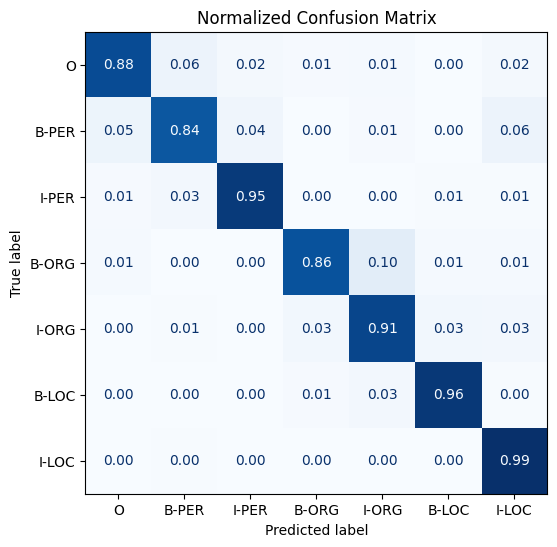

In [69]:
plot_confusion_matrix(df_tokens['labels'], df_tokens['predicted_label'], tags.names)

In [70]:
def get_samples(df):
  for _, row in df.iterrows():
    labels, preds, tokens, losses = [], [], [], []
    for i, mask in enumerate(row['attention_mask']):
      if i not in{0, len(row['attention_mask'])}:
        labels.append(row['labels'][i])
        preds.append(row['predicted_label'][i])
        tokens.append(row['input_tokens'][i])
        losses.append(f"{row['loss'][i]:.2f}")
    df_tmp = pd.DataFrame({
        'tokens': tokens,
        'labels': labels,
        'preds': preds,
        'losses': losses
    }).T

    yield df_tmp

In [71]:
df['total_loss'] = df['loss'].apply(sum)

In [72]:
df_tmp = df.sort_values(by='total_loss', ascending=False).head(3)

In [73]:
for sample in get_samples(df_tmp):
  display(sample)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
tokens,▁',▁'',▁Τ,Κ,▁'',▁',▁',▁'',▁T,▁'',▁',ri,▁'',▁',k,▁'',▁',ala,</s>
labels,O,O,O,IGN,O,O,B-LOC,I-LOC,I-LOC,I-LOC,I-LOC,IGN,I-LOC,I-LOC,IGN,I-LOC,I-LOC,IGN,IGN
preds,O,O,B-ORG,I-ORG,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O
losses,0.00,0.00,5.78,0.00,0.00,0.00,10.44,10.45,9.96,9.71,10.32,0.00,9.86,10.26,0.00,10.03,10.21,0.00,0.00


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
tokens,▁'',8,.,▁Juli,▁'',▁:,▁Protest,camp,▁auf,▁dem,▁Gelände,▁der,▁Republika,n,ischen,▁Gar,de,</s>
labels,B-ORG,IGN,IGN,I-ORG,I-ORG,I-ORG,I-ORG,IGN,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,IGN,IGN,I-ORG,IGN,IGN
preds,O,O,O,O,O,O,O,O,O,O,O,O,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,O
losses,9.07,0.00,0.00,8.97,9.15,9.48,6.94,0.00,7.85,9.48,7.72,7.53,5.88,0.00,0.00,0.01,0.00,0.00


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
tokens,▁United,▁Nations,▁Multi,dimensional,▁Integra,ted,▁Stabil,ization,▁Mission,▁in,▁the,▁Central,▁African,▁Republic,</s>
labels,B-PER,I-PER,I-PER,IGN,I-PER,IGN,I-PER,IGN,I-PER,I-PER,I-PER,I-PER,I-PER,I-PER,IGN
preds,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG
losses,6.99,6.24,6.07,0.00,6.03,0.00,5.76,0.00,5.81,5.64,5.80,6.07,6.15,6.09,0.00


In [74]:
def get_f1_score(trainer, dataset):
  return trainer.predict(dataset).metrics['test_f1']

In [75]:
f1_scores = defaultdict(dict)
f1_scores['de']['de'] = get_f1_score(trainer, panx_de_encoded['test'])
print(f"F1-score of [de] model on [de] dataset: {f1_scores['de']['de']:.3f}")

F1-score of [de] model on [de] dataset: 0.866


In [76]:
 text_fr = "Jeff Dean est informaticien chez Google en Californie"
 tag_text(text_fr, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁Jeff,▁De,an,▁est,▁informatic,ien,▁chez,▁Google,▁en,▁Cali,for,nie,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,B-ORG,O,B-LOC,I-LOC,I-LOC,O


In [77]:
def evaluate_lang_performance(lang, trainer):
  panx_ds = encode_panx_dataset(panx_ch[lang])
  return get_f1_score(trainer, panx_ds['test'])

In [78]:
f1_scores['de']['fr'] = evaluate_lang_performance('fr', trainer)
print(f"F1-score of [de] model on [fr] dataset: {f1_scores['de']['fr']:.3f}")

Map:   0%|          | 0/4580 [00:00<?, ? examples/s]

Map:   0%|          | 0/2290 [00:00<?, ? examples/s]

Map:   0%|          | 0/2290 [00:00<?, ? examples/s]

F1-score of [de] model on [fr] dataset: 0.702


In [79]:
f1_scores['de']['it'] = evaluate_lang_performance('it', trainer)
print(f"F1-score of [de] model on [it] dataset: {f1_scores['de']['it']:.3f}")

Map:   0%|          | 0/1680 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

Map:   0%|          | 0/840 [00:00<?, ? examples/s]

F1-score of [de] model on [it] dataset: 0.688


In [80]:
f1_scores['de']['en'] = evaluate_lang_performance('en', trainer)
print(f"F1-score of [de] model on [en] dataset: {f1_scores['de']['en']:.3f}")

Map:   0%|          | 0/1180 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

Map:   0%|          | 0/590 [00:00<?, ? examples/s]

F1-score of [de] model on [en] dataset: 0.583


In [81]:
def train_on_subset(dataset, num_samples):
  train_ds = dataset['train'].shuffle(seed=42).select(range(num_samples))
  valid_ds = dataset['validation']
  test_ds = dataset['test']

  training_args.logging_steps = len(train_ds) // batch_size

  trainer = Trainer(
      model_init=model_init,
      args=training_args,
      data_collator=data_collator,
      compute_metrics=compute_metrics,
      train_dataset=train_ds,
      eval_dataset=valid_ds,
      tokenizer=xlmr_tokenizer
  )

  trainer.train()

  if training_args.push_to_hub:
    trainer.push_to_hub(commit_message='Training Completed!')

  f1_score = get_f1_score(trainer, test_ds)
  return pd.DataFrame.from_dict({
      'num_samples': [len(train_ds)],
      'f1_score': [f1_score]
  })

In [82]:
panx_fr_encoded = encode_panx_dataset(panx_ch['fr'])

Map:   0%|          | 0/4580 [00:00<?, ? examples/s]

In [83]:
training_args.push_to_hub = False
metrics_df = train_on_subset(panx_fr_encoded, 250)
metrics_df

Epoch,Training Loss,Validation Loss,F1
1,1.611400,1.290540,0.023221
2,1.186100,0.994059,0.194721
3,0.996400,0.918272,0.258691


,num_samples,f1_score
0,250,0.260191


In [84]:
for num_samples in [500, 1000, 2000, 4000]:
  metrics_df = pd.concat([metrics_df, train_on_subset(panx_fr_encoded, num_samples)], ignore_index=True)

Epoch,Training Loss,Validation Loss,F1
1,1.424700,1.023299,0.273481
2,0.868600,0.658805,0.558438
3,0.594300,0.569413,0.631595


Epoch,Training Loss,Validation Loss,F1
1,1.070700,0.547355,0.668593
2,0.452200,0.419030,0.719858
3,0.301100,0.392787,0.765788


Epoch,Training Loss,Validation Loss,F1
1,0.774600,0.424113,0.729323
2,0.321700,0.343038,0.776030
3,0.204100,0.331930,0.813378


Epoch,Training Loss,Validation Loss,F1
1,0.587900,0.336302,0.785022
2,0.274500,0.305499,0.821070
3,0.178800,0.284760,0.833779


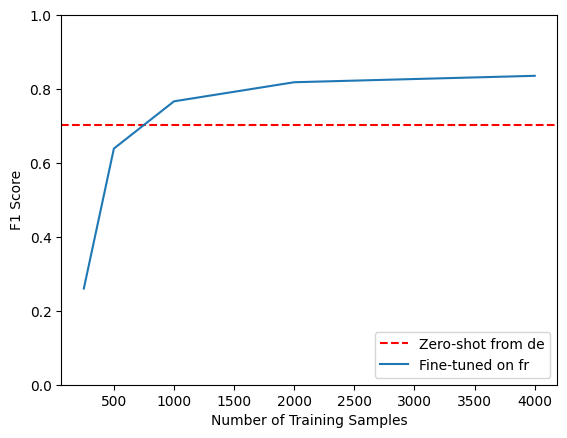

In [85]:
 fig, ax = plt.subplots()
 ax.axhline(f1_scores["de"]["fr"], ls="--", color="r")
 metrics_df.set_index("num_samples").plot(ax=ax)
 plt.legend(["Zero-shot from de", "Fine-tuned on fr"], loc="lower right")
 plt.ylim((0, 1))
 plt.xlabel("Number of Training Samples")
 plt.ylabel("F1 Score")
 plt.show()

In [86]:
from datasets import concatenate_datasets

In [87]:
def concatenate_splits(corpora):
  multi_corpus = DatasetDict()
  for split in corpora[0].keys():
    multi_corpus[split] = concatenate_datasets(
        [corpus[split] for corpus in corpora]
    ).shuffle(seed=42)
  return multi_corpus

In [88]:
panx_de_fr_encoded = concatenate_splits([panx_de_encoded, panx_fr_encoded])

In [89]:
training_args.logging_steps = len(panx_de_fr_encoded['train']) // batch_size
training_args.push_to_hub = True
training_args.output_dir = 'xlm-roberta-base-finetuned-panx-de-fr'

In [90]:
trainer = Trainer(
    model_init=model_init,
    args=training_args,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    tokenizer=xlmr_tokenizer,
    train_dataset=panx_de_fr_encoded['train'],
    eval_dataset=panx_de_fr_encoded['validation']
)

In [91]:
trainer.train()
trainer.push_to_hub(commit_message='Training Completed!')

Epoch,Training Loss,Validation Loss,F1
1,0.283600,0.185854,0.821246
2,0.148400,0.163191,0.848699
3,0.095300,0.163861,0.859062


No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/VaibhavdLights/xlm-roberta-base-finetuned-panx-de-fr/commit/63b82aa8d9fffda7e0cd4cdb0fee386078ea5fe2', commit_message='Training Completed!', commit_description='', oid='63b82aa8d9fffda7e0cd4cdb0fee386078ea5fe2', pr_url=None, repo_url=RepoUrl('https://huggingface.co/VaibhavdLights/xlm-roberta-base-finetuned-panx-de-fr', endpoint='https://huggingface.co', repo_type='model', repo_id='VaibhavdLights/xlm-roberta-base-finetuned-panx-de-fr'), pr_revision=None, pr_num=None)

In [92]:
for lang in langs:
  f1 = evaluate_lang_performance(lang, trainer)
  print(f"F1-score of [de-fr] model on [{lang}] dataset: {f1:.3f}")

Map:   0%|          | 0/12580 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

Map:   0%|          | 0/6290 [00:00<?, ? examples/s]

F1-score of [de-fr] model on [de] dataset: 0.865


F1-score of [de-fr] model on [fr] dataset: 0.859


F1-score of [de-fr] model on [it] dataset: 0.799


F1-score of [de-fr] model on [en] dataset: 0.674


In [93]:
corpora = [panx_de_encoded]

for lang in langs[1:]:
  training_args.output_dir = f"xlm-roberta-base-finetuned-panx-{lang}"
  ds_encoded = encode_panx_dataset(panx_ch[lang])
  metrics = train_on_subset(ds_encoded, ds_encoded['train'].num_rows)

  f1_scores[lang][lang] = metrics['f1_score'][0]

  corpora.append(ds_encoded)

Epoch,Training Loss,Validation Loss,F1
1,0.564700,0.324170,0.772765
2,0.267100,0.267203,0.820195
3,0.174400,0.274962,0.849510


No files have been modified since last commit. Skipping to prevent empty commit.


Epoch,Training Loss,Validation Loss,F1
1,0.721700,0.319269,0.734277
2,0.273600,0.276007,0.805522
3,0.183800,0.261933,0.832099


No files have been modified since last commit. Skipping to prevent empty commit.


Epoch,Training Loss,Validation Loss,F1
1,1.047900,0.485380,0.585653
2,0.460400,0.399503,0.660460
3,0.379700,0.390541,0.686066


No files have been modified since last commit. Skipping to prevent empty commit.


In [94]:
corpora_encoded = concatenate_splits(corpora)

In [95]:
training_args.logging_steps = len(corpora_encoded["train"]) // batch_size
training_args.output_dir = "xlm-roberta-base-finetuned-panx-all"

trainer = Trainer(
    model_init=model_init, args=training_args,
    data_collator=data_collator, compute_metrics=compute_metrics,
    tokenizer=xlmr_tokenizer, train_dataset=corpora_encoded["train"],
    eval_dataset=corpora_encoded["validation"]
)

trainer.train()
trainer.push_to_hub(commit_message="Training completed!")

Epoch,Training Loss,Validation Loss,F1
1,0.299000,0.207398,0.807836
2,0.158700,0.170465,0.846132
3,0.101200,0.175783,0.855783


CommitInfo(commit_url='https://huggingface.co/VaibhavdLights/xlm-roberta-base-finetuned-panx-all/commit/d4bdba6c3de1168fe895c6aa924ea0655d47a5d7', commit_message='Training completed!', commit_description='', oid='d4bdba6c3de1168fe895c6aa924ea0655d47a5d7', pr_url=None, repo_url=RepoUrl('https://huggingface.co/VaibhavdLights/xlm-roberta-base-finetuned-panx-all', endpoint='https://huggingface.co', repo_type='model', repo_id='VaibhavdLights/xlm-roberta-base-finetuned-panx-all'), pr_revision=None, pr_num=None)

In [96]:
for idx, lang in enumerate(langs):
  f1_scores["all"][lang] = get_f1_score(trainer, corpora[idx]["test"])
scores_data = {
    "de": f1_scores["de"],
    "each": {lang: f1_scores[lang][lang] for lang in langs},
    "all": f1_scores["all"]
}
f1_scores_df = pd.DataFrame(scores_data).T.round(4)
f1_scores_df.rename_axis(index="Fine-tune on", columns="Evaluated on", inplace=True)
f1_scores_df

Evaluated on,de,fr,it,en
Fine-tune on,,,,
de,0.8658,0.7021,0.6877,0.5830
each,0.8658,0.8411,0.8180,0.6870
all,0.8685,0.8654,0.8669,0.7678
